In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load -csv file :use inbuilt method read_csv() which defibne in pandas libary 
df=pd.read_csv('advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#to delete unwnted column unnamed:0 from given data frame permanantly
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape#no of rows & columns

(200, 4)

In [6]:
#checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

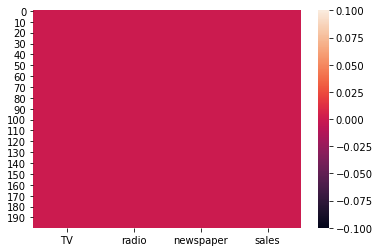

In [7]:
#visualise the null values
sb.heatmap(df.isnull())
plt.show()

In [8]:
#cross check: to check data type for null values
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
#to show all details of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()
#MEAN,COUNT,MEDIAN

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


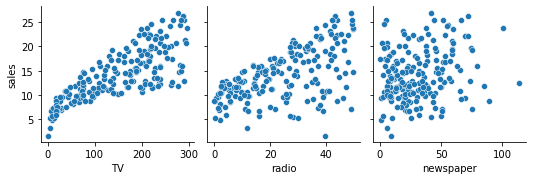

In [11]:
#to check relation betn input with output,use pairplot
sb.pairplot(data=df,x_vars=["TV",'radio','newspaper'],y_vars="sales",kind='scatter')
plt.show()

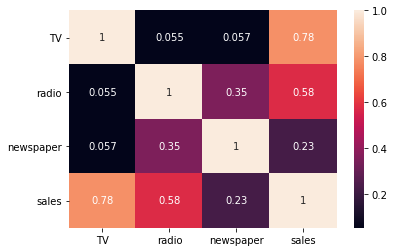

In [12]:
#checking correlation betn input & output
sb.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [14]:
df.corr().style.background_gradient()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

#It is very bad correlation means no +ve corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered

## perform the model with TV as i/p & sales as o/p

In [15]:
#perform the model:take i/p as TV & o/p as sales
#simple linear regression
#selecting i/p & o/p from  datafrme
x=df[["TV"]]#ALWAYS 2D ARRAY(independent variable)
y=df["sales"]#ALWAYS 1D ARRAY(dependent variable)

In [16]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
x_train.head(10)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [20]:
y_train.head(10)

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
5       7.2
127     8.8
105    19.2
48     14.8
66      9.5
Name: sales, dtype: float64

In [21]:
x_train.shape,x_test.shape

((140, 1), (60, 1))

In [22]:
#perform the model by using simple linear regression
#call class
from sklearn.linear_model import LinearRegression

In [23]:
#create obj of LinearRegression class\
lr=LinearRegression()

In [24]:
#train the model with 70% data,fit() inbuilt method of LinearRegression class
#no need to use standardscaler bcz of single input
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
#to check slope & intercept
m=lr.coef_
c=lr.intercept_
print("slope of Tv:",m)# shows in list bcz of multiple data
print("intercept:",c)

slope of Tv: [0.04812204]
intercept: 6.923519536059554


In [26]:
#to test the model with 30% data
y_pred=lr.predict(x_test)  #y_pred=m*x_test+c

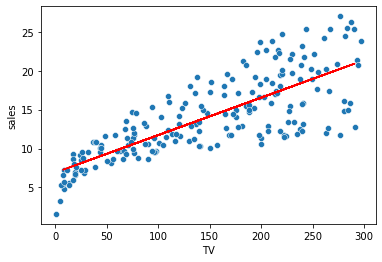

In [27]:
#visualisation:best fit line
sb.scatterplot(data=df,x="TV",y="sales")
plt.plot(x_test,y_pred,color='red')
plt.show()

In [28]:
#only perform if line visualization shows error
dict={"y_test":y_test,"y_pred":y_pred}
df1=pd.DataFrame(dict)
df1["x_test"]=x_test
df1.head()

,y_test,y_pred,x_test
58,23.8,17.067646,210.8
40,16.6,16.668233,202.5
34,9.5,11.528799,95.7
102,14.8,20.407316,280.2
184,17.6,19.136894,253.8


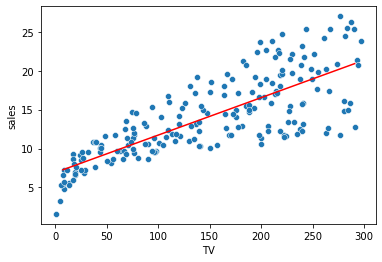

In [29]:
#visualisation:best fit line
sb.scatterplot(data=df,x="TV",y="sales")
sb.lineplot(data=df1,x="x_test",y="y_pred",color="red")
plt.show()

In [30]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

10.571057434656955


In [31]:
#finding R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.575061860494331


## perform the model with radio as i/p & sales as o/p

In [32]:
# perform the model with radio as i/p & sales as o/p
#selecting i/p & o/p from  dataframe
x=df[["radio"]]#ALWAYS 2D ARRAY(independent variable)
y=df["sales"]#ALWAYS 1D ARRAY(dependent variable)

In [33]:
#train_test_split method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
#train the model with 70% data,fit() inbuilt method of LinearRegression class
#no need to use standardscaler bcz of single input
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
#to check slope & intercept
m=lr.coef_
c=lr.intercept_
print("slope of radio:",m)# shows in list bcz of multiple data
print("intercept:",c)

slope of radio: [0.1874808]
intercept: 9.440936561425886


In [36]:
y_pred=lr.predict(x_test)

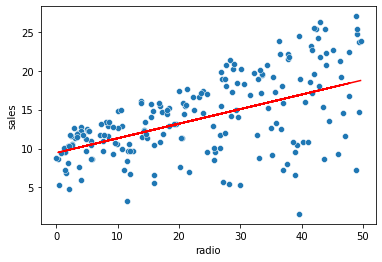

In [37]:
#visualization of best fit line
sb.scatterplot(data=df,x="radio",y='sales')
plt.plot(x_test,y_pred,color="red")
plt.show()

In [38]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

14.604130559272193


In [39]:
#finding R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.41293932917162335


## perform the model with newspaper as i/p & sales as o/p

In [40]:
#selecting i/p & o/p from  dataframe
x=df[["newspaper"]]#ALWAYS 2D ARRAY(independent variable)
y=df["sales"]#ALWAYS 1D ARRAY(dependent variable)

In [41]:
#train_test_split method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
#train the model with 70% data,fit() inbuilt method of LinearRegression class
#no need to use standardscaler bcz of single input
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
#to check slope & intercept
m=lr.coef_
c=lr.intercept_
print("slope of newspaper:",m)# shows in list bcz of multiple data
print("intercept:",c)

slope of newspaper: [0.06532045]
intercept: 11.82966888487788


In [44]:
y_pred=lr.predict(x_test)

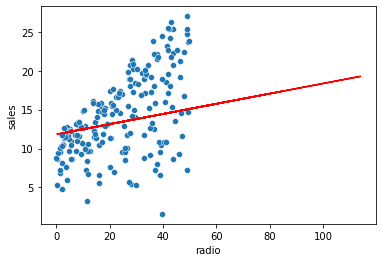

In [45]:
#visualization of best fit line
sb.scatterplot(data=df,x="radio",y='sales')
plt.plot(x_test,y_pred,color="red")
plt.show()

In [46]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

25.497452374414927


In [47]:
#finding R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-0.024953278429509007


In [48]:
''' 
slope of TV : 0.04812204  and MSE of TV  :  10.57    r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.60 r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49 r2=-0.02
'''

' \nslope of TV : 0.04812204  and MSE of TV  :  10.57    r2-score=0.578\nslope of radio :0.1874808 and MSE of radio : 14.60 r2-score=0.41\nslope of newspaper : 0.06532045 and MSE of newspaper :25.49 r2=-0.02\n'

## multiple linear regression

In [49]:
#many input & only one one o/p
#eqn=m1*x1+m2*x2+......+c
#select input & o/p
x=df.drop("sales",axis=1)  #x=df[["TV","radio",'newspaper']]
y=df['sales']  #1d array

In [50]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [51]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [52]:
#train the model with 70% data,fit() inbuilt method of LinearRegression class
#no
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
#to check slope & intercept
m=lr.coef_
c=lr.intercept_
print(x.columns)
print("slopes:",m)# shows in list bcz of multiple data
print("intercept:",c)

Index(['TV', 'radio', 'newspaper'], dtype='object')
slopes: [0.04695205 0.17658644 0.00185115]
intercept: 2.937215734690609


In [54]:
y_pred=lr.predict(x_test)

In [55]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

1.9289249074665729


In [56]:
#finding R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9224605706201435


In [57]:
#Here r2-score is close to 1 means it is best score and MSE is very low

In [58]:
#create a dataframe df2 which hold input columns & slope
dict={'input_columns':x.columns,'slope':lr.coef_}
#convert dict into dataframe
df2=pd.DataFrame(dict)
df2

,input_columns,slope
0,TV,0.046952
1,radio,0.176586
2,newspaper,0.001851


In [59]:
#checking assumptions of Linear Regression
#there are 4 types of assumption of linear Regression
#1.should not be multicolinearity in Linear Regression

In [60]:
#what is multicolinearity ?
#multicolinearity means if one input is correlated with other input . 
#means multicolinearity occurs

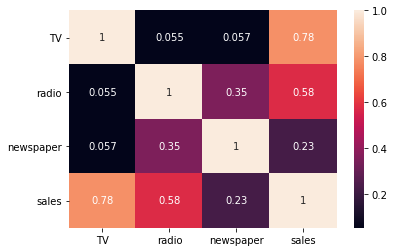

In [61]:
#first check multicolinearity in our dataset
sb.heatmap(df.corr(),annot=True)
plt.show()

tv /radio=0.055 -weak(less than 0.1)
tv/newspaper=0.057 -weak
radio/newspaper=0.35 -strong correlation
so i/p       o/p          corr
   radio     sales        0.58
newspaper    sales        0.23

so correlation betn radio & sales is greater than newspaper & sales 
so we take radio as input from these

In [62]:
#here input radio and input newspaper both are corelated each other 
#value of corr between radio and newspaper =0.35 means multicolinearity 
#situation occurs
#so check corr of both input radio and input newspapaer with o/p and 
#remove those input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so remove newspaper from dataset 
#and perform TV and radio with sales
#solved multicolinearity problem means we removed multicolinearity

# multiple linear regression(TV & radio)

In [63]:
x=df[["TV","radio"]]
y=df['sales']

In [64]:
x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [65]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [66]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [67]:
x_train.shape,y_train.shape

((140, 2), (140,))

In [68]:
#train the model with 70% data,fit() inbuilt method of LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred=lr.predict(x_test)

In [70]:
#to check slope & intercept
m=lr.coef_
c=lr.intercept_
print(x.columns)
print("slopes:",m)# shows in list bcz of multiple data
print("intercept:",c)

Index(['TV', 'radio'], dtype='object')
slopes: [0.04697554 0.17765046]
intercept: 2.9647671191401574


In [71]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

1.9147050289721788


In [72]:
#finding R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9230321850256801


In [73]:
#2 assumption:there should be linear relationship betn alll input with output
#take input:tv & radio
#output:sales

2. Assumption :  Linear relationship means There should be a linear relation
 ship. 
 when does linear regression  do best work ? 
 where got better relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means 
 Residual =(actual output-predicted output)
 '''

In [74]:
#use tricks: find a residual error=actual o/p - predicted o/p (Y_test-y_pred)
residual=y_test-y_pred
residual

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64

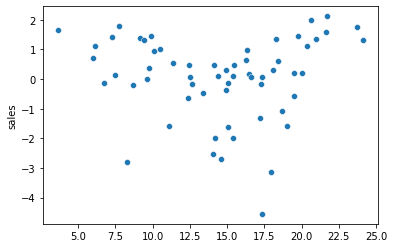

In [75]:
#visuliaze scattter plot betn y_pred & residual error
sb.scatterplot(y_pred,residual)
plt.show()

In [76]:
#in above scatterplot, This is not a linear relation between Y_pred
# and residual means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill
#means fail 2nd assumption

In [77]:
#3rd Assumption : -  if occur linear relation then next check relation is 
#homoskedatik, not a heteroskedastik 
#but no found any linear relation means
#not satify 3rd assumption
#means 3rd Assumption totally depend on Second Assumption


#Homoskedatik means datapoints close each others
#Heteroskedastik means datapoints not close each others

In [78]:
#4th Assumption :residual should be normally distributed
#normally distributed means data should be distributed wqually on both sides 
#means mean=median=mode are same means skewness=0

In [79]:
#resdiual:continoues numeric values
residual.dtype

dtype('float64')

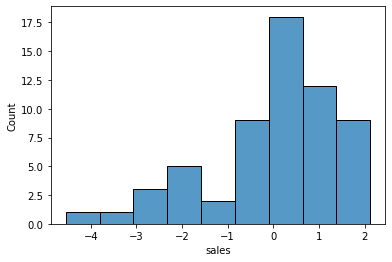

In [80]:
#if data is continous numeric then create a histogram
#if data is categorical then create a countplot
sb.histplot(residual)
plt.show()

In [81]:
#clearly showing- negative skiwness
#cross check
#find skewness of resdiual 
#use inbuilt function skew()
residual.skew()

-1.0935181639447331

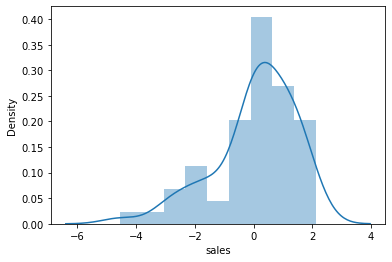

In [82]:
#if show distribution of residual data
#use inbuilt function distplot()
sb.distplot(residual)
plt.show()

In [83]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a AS-symmetric curve means this assumption is not fullfill

#here we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
##relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

In [84]:
#solve remaining 3 assumption then 
#increase the degress of X means increase the power of X means 
#independent vairable(input variable)
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)

In [85]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#increase the degree of input variable=2
#equation Y=m1*TV*2+m2*TV+m3*radio*2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b

In [86]:
#take input variable
x=df[["TV","radio"]]  #2d
#take o/p variable
y=df["sales"]  #1d

In [87]:
x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [88]:
#increase the  degree on input variable (degree=2)\
#use inbuilt function=PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [89]:
#creating object
#passsing the argument in PolynomialFeatures
#degree od independent variable x(take input=2)
pf=PolynomialFeatures(3)#here degree=2

In [90]:
#fit_transform():inbuilt method of PolynomialFeatures class
#with the help of fit_transform(),to increase degree of input x
x_poly=pf.fit_transform(x)#changes to numpy array

In [91]:
x_poly  #normalized floating type (output=e^)

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        2.00135918e+06, 3.28776084e+05, 5.40101520e+04],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        7.78238250e+04, 6.87298050e+04, 6.06984570e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.35790560e+04, 3.62371320e+04, 9.67025790e+04],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        2.91359700e+05, 1.53087300e+04, 8.04357000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        3.37801632e+06, 5.00270400e+05, 7.40880000e+04],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        4.63285526e+05, 1.71661160e+04, 6.36056000e+02]])

In [92]:
#train_test_split method
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [93]:
#train the model with 70% data,fit() inbuilt method of LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
#slope & intercept 
m=lr.coef_
c=lr.intercept_
print("slopes:",m)
print("intercept:",c)


slopes: [ 0.00000000e+00  9.16483199e-02  2.25347616e-02 -4.65701531e-04
  1.30652795e-03 -1.62567917e-04  8.31531755e-07 -7.44270012e-07
 -1.18928234e-06  9.37589630e-06]
intercept: 4.162147477279852


In [95]:
#test the model with 30% data
y_pred=lr.predict(x_test)

In [96]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.1446907864615957


In [97]:
#finding R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9941836818139852


# CHECKING REMAiNING ASSUMPTIONS(2nd 3rd 4th)


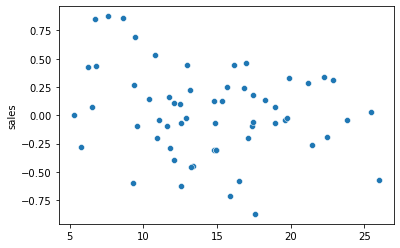

In [98]:
#2nd assumption-there should be linear relation betn input & output
#use trick,find residual
residual=y_test-y_pred
#create scatterplot to check linear relation betn residual & y_pred or not
sb.scatterplot(y_pred,residual)
plt.show()

In [99]:
#2nd assumption fullfill

In [100]:
#3rd assumption,see hetroshedastic points means this assumption is not fullfill

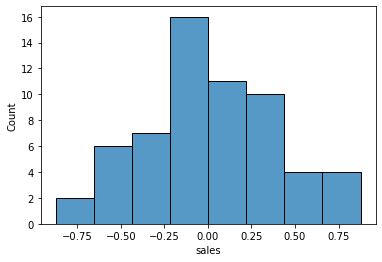

In [101]:
#4th assumption:check N.D curve
#create a freq graph on residual :continous numerical value
sb.histplot(residual)
plt.show()

In [102]:
#clearly showing- positive skiwness
#cross check
#find skewness of resdiual 
#use inbuilt function skew()
residual.skew()

0.07135639577628046

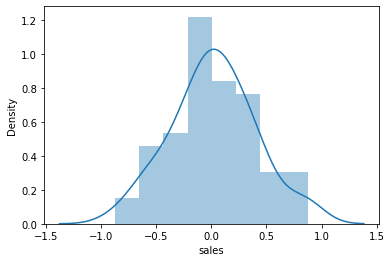

In [103]:
#if show distribution of residual data
#use inbuilt function distplot()
sb.distplot(residual)
plt.show()

In [ ]:
#AFTER CHANGING DEGREE=3,SKEWNESS=0.07 WHICH IS LESS THAN 0.1
#R2_SCORE=0.99
#SO 4TH ASSUMPTION FULLFILLED
#(1,2,4 ASSUMPTIONS)FULLFILLED
